# 20기 Clustering 정규세션 과제

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 0. 데이터 불러오기

In [2]:
import pandas as pd
df = pd.read_csv("Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


## 1. Preprocssing / EDA

In [3]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
from sklearn.model_selection import train_test_split
X_train=df[df.columns[1:]]

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

## 2. Clustering

In [13]:
#clustering
#knn
#kmeans clustering
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2)
kmeans.fit(X_train_scaled)

c:\Users\admin\anaconda3\envs\sudal\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\admin\anaconda3\envs\sudal\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [15]:
X_test_scaled = scaler.transform(X_test)
kans=kmeans.transform(X_test_scaled)

In [24]:
y_test
# want to change y_test to binary encoding
y_test = y_test.replace('Male', 1)
y_test = y_test.replace('Female', 0)

In [29]:
# find best cluster number
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 123  , algorithm='elkan') )
    algorithm.fit(X_test_scaled)
    inertia.append(algorithm.inertia_)


c:\Users\admin\anaconda3\envs\sudal\lib\site-packages\sklearn\cluster\_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(
c:\Users\admin\anaconda3\envs\sudal\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


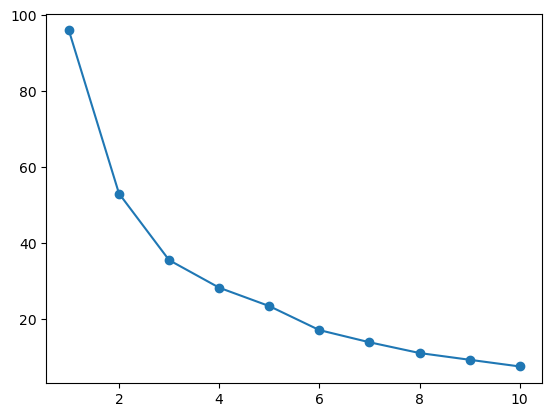

In [33]:
# plt plot inertia whici is array
plt.plot(range(1, 11), inertia, marker='o')

### elbow 를 5로 결정


In [ ]:
###

In [35]:
#draw elbow
#draw silhouette
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X_train_scaled)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_


In [37]:
print(labels,centroids)

[4 0 1 1 0 0 3 3 0 4 3 0 3 2 4 4 2 4 2 4 0 3 3 1 3 4 1 0 4 2 3 0 2 3 4 3 1
 0 3 3 1 4 4 0 0 4 0 1 2 3 1 0 4 3 3 2 0 1 3 3 3 1 2 0 4 2 1 4 2 2 2 3 2 0
 4 0 4 1 0 1 4 4 0 2 3 3 2 0 3 3 2 3 3 2 3 2 3 3 4 0 2 2 0 3 4 1 3 4 3 4 2
 0 4 1 3 4 0 0 3 4 0 2 0 0 4 4 4 4 2 3 3 3 3 4 4 2 0 3 0 0 3 3 0 2 0 3 3 4
 3 4 2 0 1 2 4 4 1 4 0 4] [[-4.17690149e-01  9.76934761e-01  1.15734744e+00]
 [ 4.96061710e-01 -1.22626826e+00 -1.29800470e+00]
 [ 9.71962589e-04  1.00037770e+00 -1.22049694e+00]
 [-9.61730870e-01 -7.63064649e-01  4.31489197e-01]
 [ 1.25037607e+00 -1.98541424e-01 -1.06360490e-01]]


## 3. Evaluation

In [38]:
#kmeans evaluation metric
from sklearn.metrics import silhouette_score


silhouette_score(X_train_scaled, kmeans.labels_)

0.33369448027171933